<a href="https://colab.research.google.com/github/Karan345/DS_ML_Practice/blob/main/Torch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
a=torch.tensor(1.5)
b=torch.tensor(2.5)
c=torch.add(a,b)
print(c)

tensor(4.)


In [2]:
print(torch.__version__)

2.0.1+cu118


### Building MLP

In [3]:
import torch.nn as nn

model=nn.Sequential(
    nn.Linear(8,12),
    nn.ReLU(),
    nn.Linear(12,8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


# Training a Pytorch Model


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pwd

/content


In [6]:
import numpy as np
import torch.optim as optim

In [7]:
dataset =np.loadtxt('/content/drive/MyDrive/pima-indians-diabetes.csv', delimiter=',')


In [8]:
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.7321784496307373
Finished epoch 1, latest loss 0.6102508902549744
Finished epoch 2, latest loss 0.5635911226272583
Finished epoch 3, latest loss 0.5402131080627441
Finished epoch 4, latest loss 0.5308462381362915
Finished epoch 5, latest loss 0.524653434753418
Finished epoch 6, latest loss 0.5191311836242676
Finished epoch 7, latest loss 0.5109415054321289
Finished epoch 8, latest loss 0.5115984678268433
Finished epoch 9, latest loss 0.5023643970489502
Finished epoch 10, latest loss 0.4932219684123993
Finished epoch 11, latest loss 0.48973754048347473
Finished epoch 12, latest loss 0.48620712757110596
Finished epoch 13, latest loss 0.48809269070625305
Finished epoch 14, latest loss 0.4772709012031555
Finished epoch 15, latest loss 0.47636643052101135
Finished epoch 16, latest loss 0.4741005003452301
Finished epoch 17, latest loss 0.4665892720222473
Finished epoch 18, latest loss 0.46987184882164
Finished epoch 19, latest loss 0.46398818492889404
Finished

In [9]:
i = 5
X_sample = X[i:i+1]
y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2968], grad_fn=<SelectBackward0>)


In [10]:
i = 5
X_sample = X[i:i+1]
model.eval()
with torch.no_grad():
    y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2968])


In [11]:
model.eval()
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7630208134651184


#TorchVison

In [12]:
import matplotlib.pyplot as plt
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

100%|██████████| 170498071/170498071 [00:04<00:00, 37612590.78it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


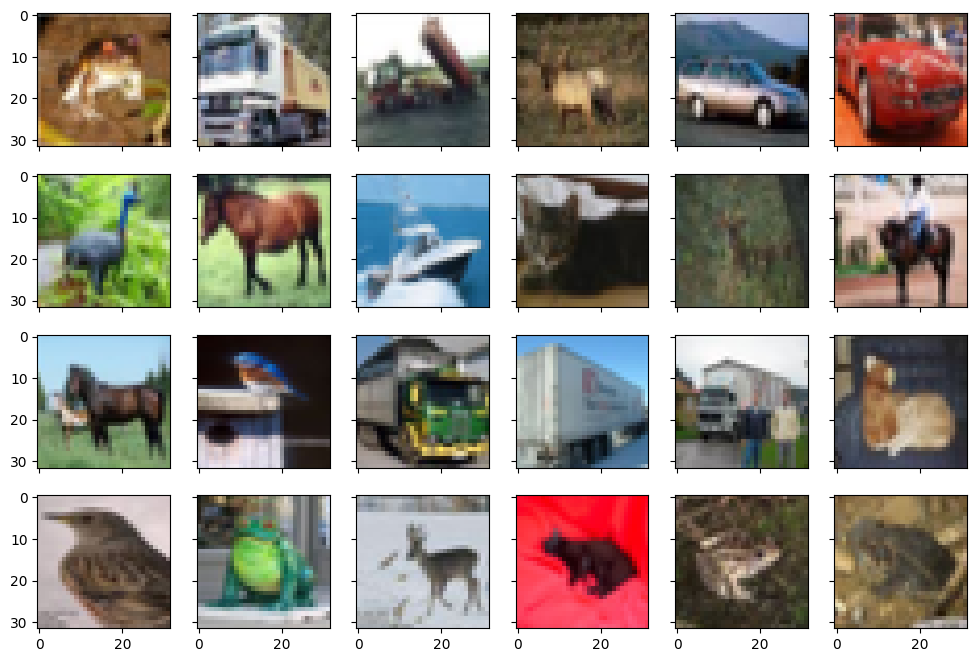

In [13]:
fig,ax = plt.subplots(4,6, sharex=True, sharey=True, figsize=(12,8))
for i in range(0,24):
  row,col = i//6, i%6
  ax[row][col].imshow(trainset.data[i])
plt.show()

# Using Pyorch Dataloader

In [14]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
batch_size=24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

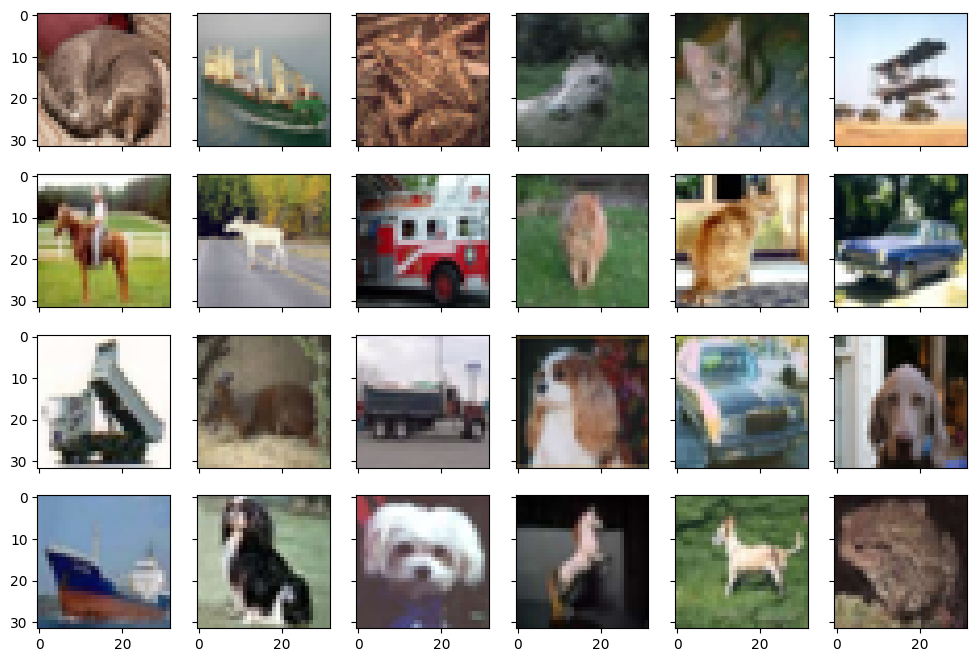

In [16]:
fig,ax = plt.subplots(4,6, sharex=True, sharey=True, figsize=(12,8))
for images,labels in trainloader:
  for i in range(batch_size):
     row,col = i//6, i%6
     ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
  break
plt.show()

#Convolutional Neural Network

In [17]:
model=nn.Sequential(
    nn.Conv2d(3,32,kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32,32,kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    nn.Flatten(),
    nn.Linear(8192,512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512,10),
)

print(model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


# Train the classifier - Multiclass classification

Using previous dataloader for CIFAR-10

In [18]:
loss_fn0 = nn.CrossEntropyLoss()
optimizer0 = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [20]:
n_epochs = 20
for epoch in range(n_epochs):
  model.train()
  for inputs,labels in trainloader:
    y_pred = model(inputs)
    loss = loss_fn0(y_pred, labels)
    optimizer0.zero_grad()
    loss.backward()
    optimizer0.step()
  acc=0
  count=0
  model.eval()
  with torch.no_grad():
    for inputs, labels in testloader:
      y_pred = model(inputs)
      acc+=(torch.argmax(y_pred,1)==labels).float().sum()
      count+=len(labels)
  acc /= count
  print("    Epoch %d" % (epoch))
  print("----------------")
  print("Acuracy = %.3f%%" %(acc*100))

    Epoch 0
----------------
Acuracy = 68.670%
    Epoch 1
----------------
Acuracy = 68.140%
    Epoch 2
----------------
Acuracy = 69.060%
    Epoch 3
----------------
Acuracy = 69.480%
    Epoch 4
----------------
Acuracy = 69.370%
    Epoch 5
----------------
Acuracy = 70.100%
    Epoch 6
----------------
Acuracy = 70.080%
    Epoch 7
----------------
Acuracy = 70.050%
    Epoch 8
----------------
Acuracy = 70.130%
    Epoch 9
----------------
Acuracy = 70.090%
    Epoch 10
----------------
Acuracy = 69.950%
    Epoch 11
----------------
Acuracy = 69.870%
    Epoch 12
----------------
Acuracy = 70.330%
    Epoch 13
----------------
Acuracy = 70.220%
    Epoch 14
----------------
Acuracy = 70.310%
    Epoch 15
----------------
Acuracy = 70.160%
    Epoch 16
----------------
Acuracy = 70.470%
    Epoch 17
----------------
Acuracy = 70.160%
    Epoch 18
----------------
Acuracy = 70.250%
    Epoch 19
----------------
Acuracy = 69.950%
